# Data Visualizations with Python

So far we have looked into how we can load data and quickly do some summary analysis. Also how we can filter data based on columns, rows, and conditions. Finally we looked into creation of new variables, and then grouping and summarizing data. Todays session we will look into data visualization using Python

In data visualization, there are several libraries python uses, but the most common ones are Seaborn and Matplotlib We will be working with both the libraries in this session. So the first thing we will do, if you remember from the last session, is to load the data and then download the libraries

To load the data we will need Pandas

In [1]:
# Importing pandas
import pandas as pd

# Importing our direct marketing dataset
dm = pd.read_csv("/Users/muhammadsaqifulalam/Dropbox/My Mac (FVFD1URVP3XY)/Desktop/DirectMarketing.csv")

# To check if we have loaded the right dataset
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


Looks legit! We will be working with two more variables that is of interest which we can calculate from the data we have here - Spending per Catalog, and Spending as a Ratio of Salary

In [2]:
# Calculating spending per catalog
dm["Spend_per_Cat"] = dm["AmountSpent"]/dm["Catalogs"]

# Calculating Amount Spent as a ratio of Salary
dm["Spending_Sal_Ratio"] = dm["AmountSpent"]/dm["Salary"]

# Making sure we did the right thing
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Spend_per_Cat,Spending_Sal_Ratio
0,Old,Female,Own,Single,Far,47500,0,High,6,755,125.833333,0.015895
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,219.666667,0.020723
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,16.444444,0.021926
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,135.333333,0.028458
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,108.666667,0.019064


Now it is our turn to load the libraries in Python and then working with them. For our benefit we will repeat the install functions for both the libraries. This we do at times, instead of checking whether we have the library already installed, because, sometimes the library might be outdated, and when we install the library again, it gets updated. Also, this makes our codes more versatile - what if we want to run this same code in some other conputer which does not have the library!

In [3]:
# Installing Seaborn
import sys
!{sys.executable} -m pip install seaborn

In [4]:
# Installing Matplotlib
!{sys.executable} -m pip install matplotlib # notice that i am not importing sys again - we did that before

In [5]:
# Now its time to load the libraries

# Interestingly matplotplib and seaborn needs few lines of extra code to set them up initially

# The first line of code will tell pandas to connect its functions with that of matplotlib
pd.plotting.register_matplotlib_converters()

# Now we import Matplotlib
import matplotlib.pyplot as plt # notice that we not importing the whole matplotlib, but the part of matplotlib that we would require - the pyplot - the section of matplotlib we use to create viz in python

# Next we use an interesting command. Normally in python the plots can open in separate windows and pages, which
# makes the whole process a bit cumbersome. So we can give a function to make Jupyter notebooks print the plot in
# the notebook itself. So we give that command
%matplotlib inline

# Now we are ready to load seaborn
import seaborn as sns

# This will conclude our installing and loading of libraries

Phew! Quite an extensive preparation. But thats all the complicated part. The next steps will be as close to english as possible, where we will ask python to draw us different charts using the dm data

## Categorical Variable Visualizations

As we have seen before, normally any dataset can have either numeric data or non-numeric data - also called categorical data. We start with looking at how we can create visualizations of categorical data. The easies way to visualize categorical data is with bar and column plots

<AxesSubplot:xlabel='Age'>

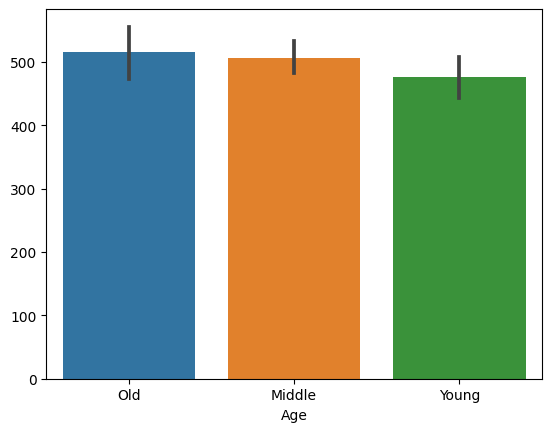

In [6]:
# What is the age distribution of our customers

sns.barplot(y = dm.index, x = dm["Age"])

<AxesSubplot:ylabel='Age'>

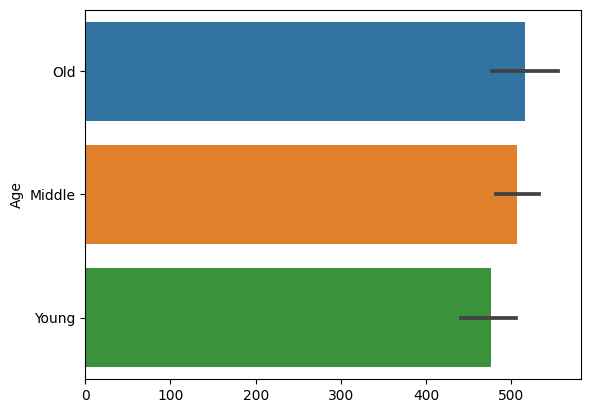

In [7]:
# Or we can rotate this chart!

sns.barplot(x = dm.index, y = dm["Age"])

As you can seem, the bar plot we have created is very basic, and just gives us counts. What if instead of counts, we needed percentage of total as the axis of the graph?

This is where, you will need to pull in your previous knowledge of python functions to get to you job:
1. We will need to aggregate the data to get the total number of customers in each age group, and create a new dataframe from there
2. Need to create a new column that gives us the percentage
3. Create a barplot from that dataframe

In [8]:
# Using GroupBy and Count to give us the dataset which summarized the Age count. Notice that this time we are using
# another extra code - reset_index. This helps us name the column as well, which we will need
age_count = dm.groupby("Age").Age.count().reset_index(name = "Count")

# To ensure that the dataframe is properly created
age_count.head()

,Age,Count
0,Middle,508
1,Old,205
2,Young,287


In [9]:
# Now to create a new column, Percentage of Total
age_count["Perc_of_Total"] = age_count["Count"]/sum(age_count["Count"])

age_count.head()

,Age,Count,Perc_of_Total
0,Middle,508,0.508
1,Old,205,0.205
2,Young,287,0.287


<AxesSubplot:xlabel='Age', ylabel='Perc_of_Total'>

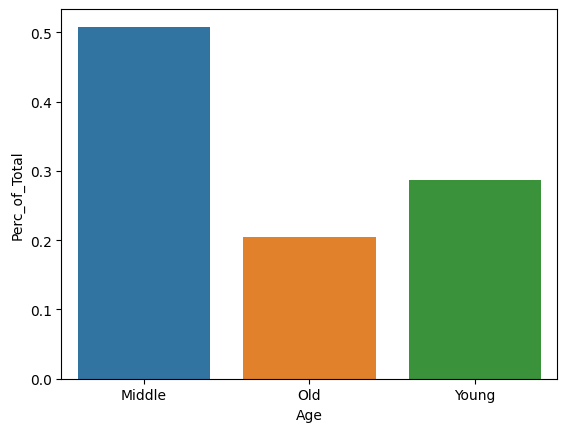

In [10]:
# Now we are ready to create the barplot 
sns.barplot(y = age_count["Perc_of_Total"], x = age_count["Age"])

Now that we have looked into visualizing one column, how about we want to visualize two columns. Suppose we want to know the distribution of Age and Gender in our data. Very easy!

<AxesSubplot:xlabel='Gender'>

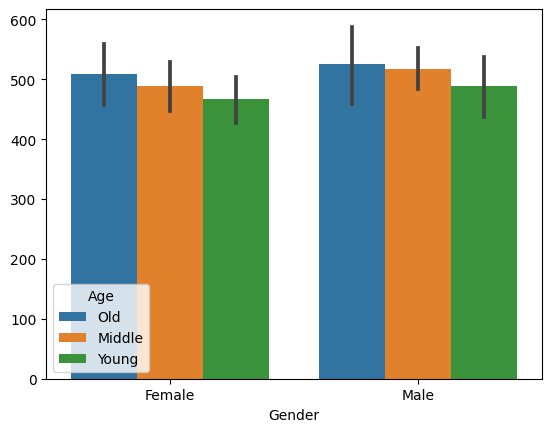

In [11]:
# To get a bar plot of distribution of gender and age group
sns.barplot(y = dm.index, x = "Gender", hue = "Age", data = dm)

As we can see, there is something off here. The total number of the bars, if we add, will give us more than 1000 customers! This is one of the issues with the common MatplotLib and Seaborn in python, they are very good with handling a mix of numbers and categorical variables, but not the best with counting categorical variables. We will need to use the previous approach - creating a summary data frame and then plotting it

In [12]:
# Creating a summary dataframe using groupby and reset index
Age_Gennder_Count = dm.groupby(["Age", "Gender"]).Age.count().reset_index(name = "Count")

Age_Gennder_Count.head()

,Age,Gender,Count
0,Middle,Female,206
1,Middle,Male,302
2,Old,Female,129
3,Old,Male,76
4,Young,Female,171


<AxesSubplot:xlabel='Age', ylabel='Count'>

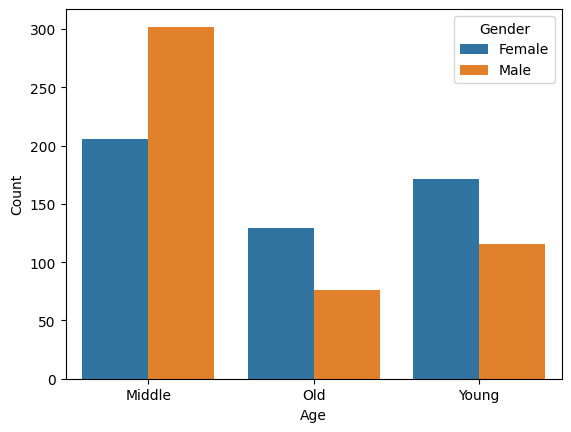

In [13]:
# Now that we have the summarized dataframe, are ready to create our barplot
sns.barplot(y = "Count", x = "Age", hue = "Gender", data = Age_Gennder_Count)

We can also do the same with percentages! Give it a shot, taking example from the previous time we created a percentage bar chart

What we want to create a bar plot where the gender is stacked on top of each other? This again creates a small difficulty, but again, is a good point in our lesson to learn some more useful data transforming functions

For the stacked bar plot, we will need to supply to python a dataset with Age as a column, Male as a column, and Female as a column. To do this we will use a handy function in pandas called pivot, which takes in our summary table and transforms our table to a pivot table - with some groups in rows and some groups columns!

In [14]:
# To start with, let us convert our Age Gender Count table to a pivot table with Age values in rows, Gender values in columns, and in the table fill it up with counts
Age_Gender_Count_Pivot = pd.pivot(Age_Gennder_Count, index = "Age", columns = "Gender", values = "Count")

Age_Gender_Count_Pivot.head()

Gender,Female,Male
Age,,
Middle,206,302
Old,129,76
Young,171,116


<AxesSubplot:xlabel='Age'>

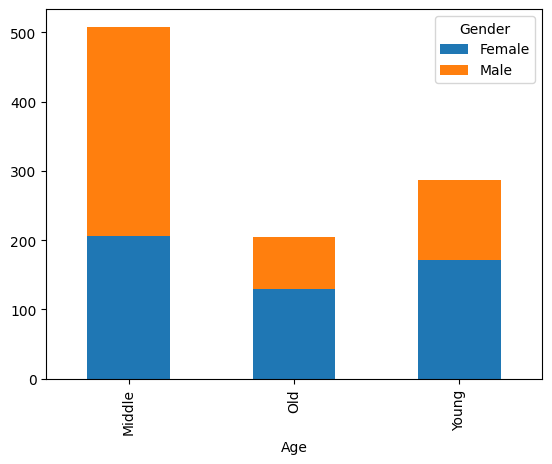

In [15]:
# Now to create a stacked bar chart, the syntax is a bit different, but easier actually
Age_Gender_Count_Pivot.plot(kind = "bar", stacked = True)

This makes things very interesting! Because now we can also draw a stack chart which gives us an idea of the gender disparity among the age group of our customers! To do so, we need to just transform our pivoted table a bit

In [16]:
# We star with looking at the Age Gender Count Pivot Table
Age_Gender_Count_Pivot

Gender,Female,Male
Age,,
Middle,206,302
Old,129,76
Young,171,116


As I have already mentioned few times we can get our job done in many ways in Python. The way we got te above table, could be obtained much easily using the crosstab functioin in pandas, and we will use this to create the same table and create our stacked bar chart

In [17]:
# First lets see how we can easily cross tabulate and create the above table in pandas
pd.crosstab(dm["Age"], dm["Gender"])

Gender,Female,Male
Age,,
Middle,206,302
Old,129,76
Young,171,116


In [18]:
# Now, instead of storing the exact count what if we want the percentage of total for each of the cells
pd.crosstab(dm["Age"], dm["Gender"], normalize = True)

Gender,Female,Male
Age,,
Middle,0.206,0.302
Old,0.129,0.076
Young,0.171,0.116


In [19]:
# But what if I want to know only about the row percentages, that is what is the gender ratio of Old group, 
# what is the gender ratio of young group etc

pd.crosstab(dm["Age"], dm["Gender"], normalize = "index")

Gender,Female,Male
Age,,
Middle,0.405512,0.594488
Old,0.629268,0.370732
Young,0.595819,0.404181


In [20]:
# To get percentage of columns
pd.crosstab(dm["Age"], dm["Gender"], normalize = "columns")

Gender,Female,Male
Age,,
Middle,0.407115,0.611336
Old,0.254941,0.153846
Young,0.337945,0.234818


<AxesSubplot:xlabel='Age'>

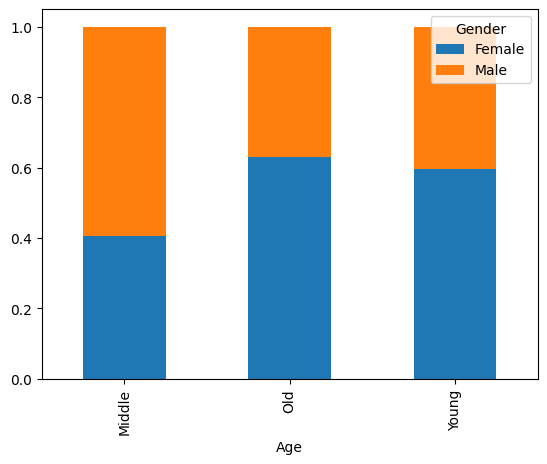

In [21]:
# okk so lets now create two stacks, which tells us similar things

# first lets get the stack chart of Gender distribution by Age group

Age_Gender_CrossT_Rows = pd.crosstab(dm["Age"], dm["Gender"], normalize = "index")

Age_Gender_CrossT_Rows.plot(kind = "bar", stacked = True)

This shows that Female gender dominated in the Old and Young Groups, whereas Male gender dominated in the middle age group. What if we want see the distribution of age group for each gender?

In [22]:
# Lets again create a crosstab for distribution of Age of Group percentages for gender

Gender_Age_Crosstab = pd.crosstab(dm["Gender"], dm["Age"], normalize = "index")

# A look at what we got
Gender_Age_Crosstab

Age,Middle,Old,Young
Gender,,,
Female,0.407115,0.254941,0.337945
Male,0.611336,0.153846,0.234818


<AxesSubplot:xlabel='Gender'>

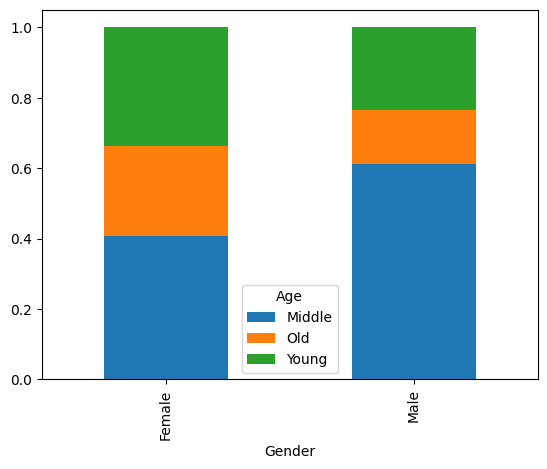

In [23]:
# Now to crete our stack
Gender_Age_Crosstab.plot(kind = "bar", stacked = True)

Whew! That is a lot of work on creating many interesting bar charts. But we are not done yet! As I pointed out few lines of codes before, seaborn and matplotlib are better with numbers and categorical variables. Lets look at them now!

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

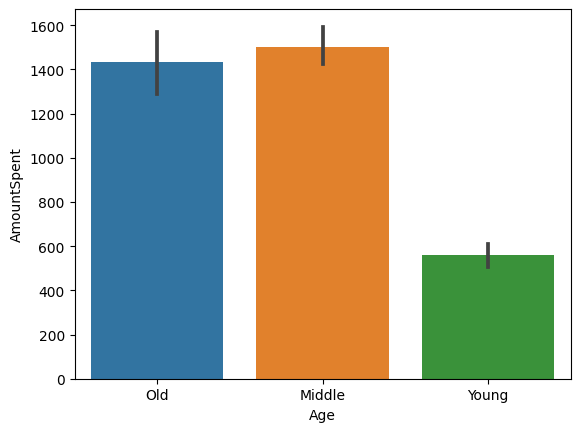

In [24]:
# A bar chart showing the income of each age group
sns.barplot(x = "Age", y = "AmountSpent", data = dm)

This, by default, gives us the average spending amount of each of the age groups, with the black line showing the Std dev of the spenidng. But now instead of average spending, what if we want to see the total spending for each age group

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

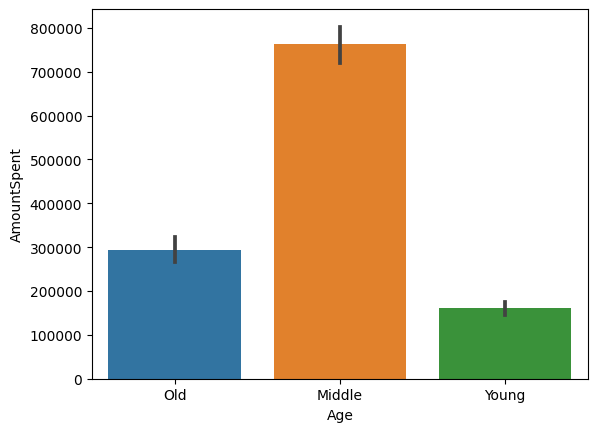

In [25]:
# Total spenidng for each age group
sns.barplot(x = "Age", y = "AmountSpent", data = dm, estimator = sum)

So spending amout wise, Middle group spent the most! But remember, they were also over represented

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

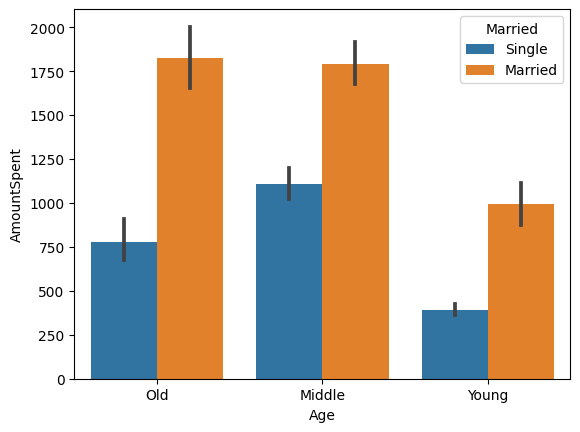

In [26]:
# What if we want to see the average spending of each types of marital status and age group?
sns.barplot(x = "Age", y = "AmountSpent", hue = "Married", data = dm)

This conludes our section of creating bar charts with Seabonr and Matplotlib in Python. Yet again, we have just scratched the surface, and these bar charts can be modified and played around with many many other ways

## Boxplots and Histograms - Explroing Numeric Variables

So far we have deleved very deeply into how we can create different types of bar charts, and there is a reason to do so. Most of the data we have are a combination of numeric and non numeric variables, and bars are one of the easiest and most intuitive ways to visualize these information. In this section we will look at how can we work with boxplots. If you remember your statistics, you would know that boxplots are very useful in summarizing numeric variables as well as guessing the outcomes of different patterns among the data.

<AxesSubplot:ylabel='AmountSpent'>

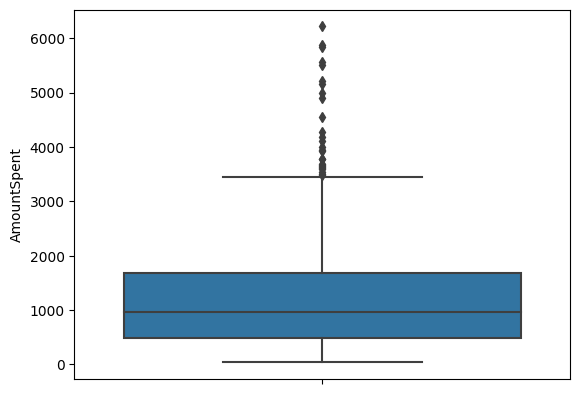

In [27]:
# First we attempt to create a box plot of AmountSpent, our key variable of interest in dm
sns.boxplot(y = "AmountSpent", data = dm)

Now you are starting to get a sense that when you know to create one chart, its starts getting easier to create others. In fact the syntax is not very different from the barplot, and very easily you are getting what you were looking for. Lets spend some time understanding what the above output means

<AxesSubplot:xlabel='Gender', ylabel='AmountSpent'>

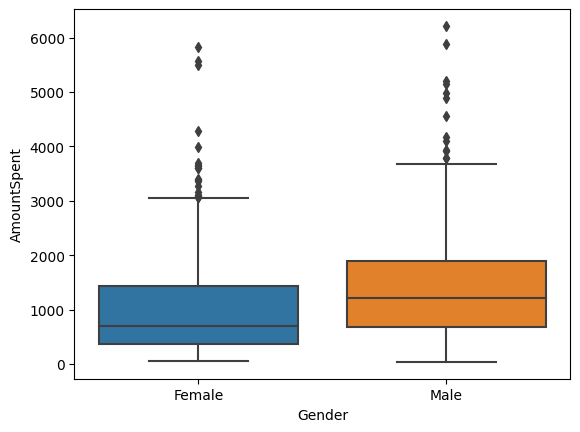

In [28]:
# How about we try to see the spending distribution between gender?
sns.boxplot(x = "Gender", y = "AmountSpent", data = dm)

Both the genders do spend similar amounts, and the box plots indicate that they might not be statistically different. Ofcourse we will test them statistically using T.Tests next session. But this shows that make gender has propensity to spend in high amounts.

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

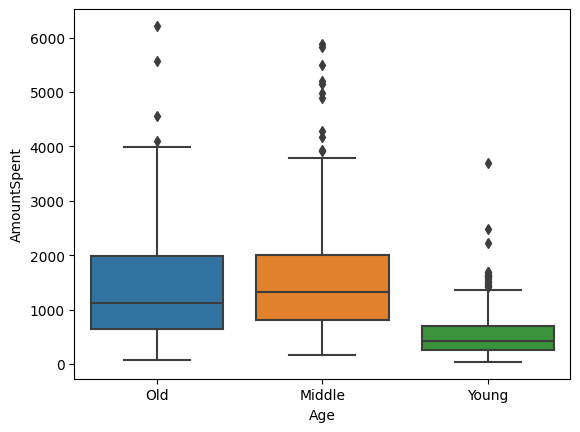

In [29]:
# What about spending across age groups?
sns.boxplot(x = "Age", y = "AmountSpent", data = dm)

This clearly shows that the young age group spends significantly less that Old and Middle

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

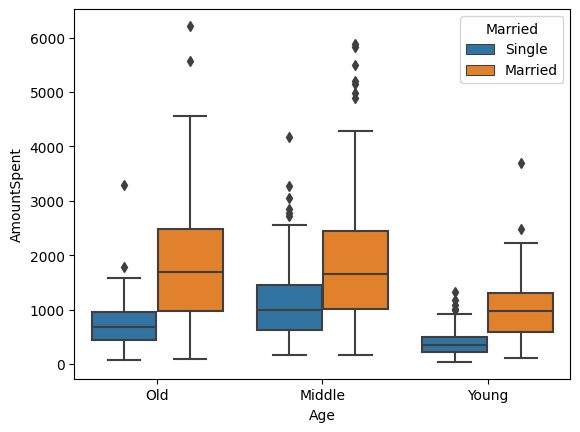

In [30]:
# How about Spending of different age groups, segregated by marital status?
sns.boxplot(x = "Age", y = "AmountSpent", hue = "Married", data = dm)

Another useful chart to explore the distribution of a numeric variable is the histogram, a chart we are all very popular about. Lets take a look at creating histogram in Python

<AxesSubplot:xlabel='Salary', ylabel='Count'>

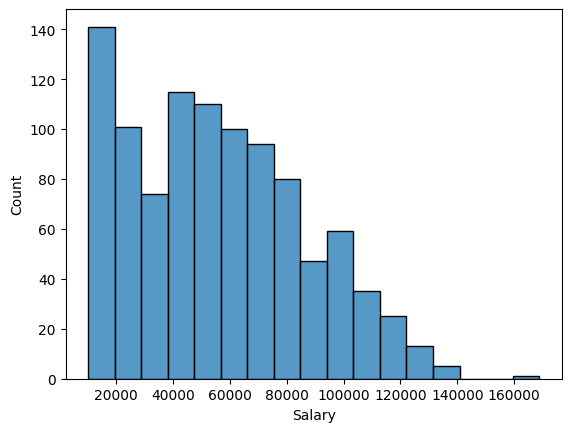

In [31]:
# Creating a histogram of Salaries earned by the customers
sns.histplot(dm["Salary"])

This shows that the Salary of our customers are mostly concentrated around the 20,000 to 60,000 zone, with very few earning monthly 1.6 lac and above. Another good way to show distribution is using the density plot

<AxesSubplot:xlabel='Salary', ylabel='Density'>

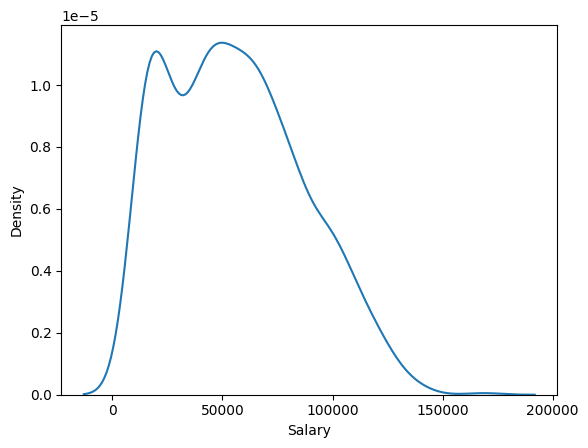

In [32]:
# A density plot of our customers earnings
sns.kdeplot(dm["Salary"])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

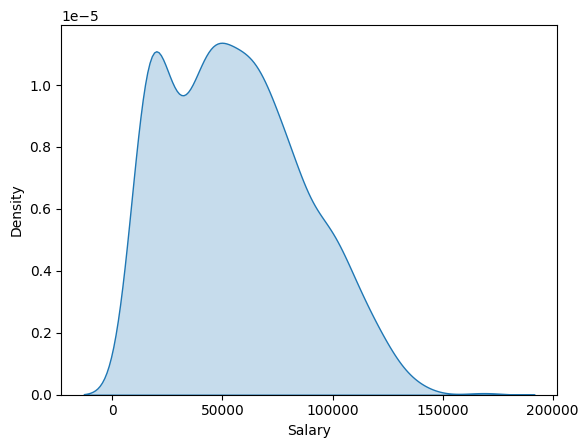

In [33]:
# This looks a bit bare, so we can introduce a parameter called shading
sns.kdeplot(dm["Salary"], shade = True)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

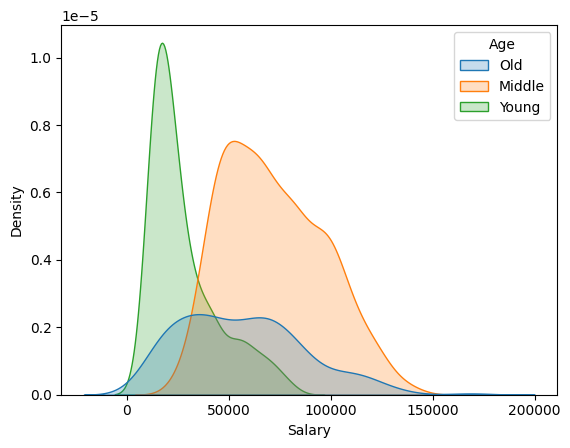

In [34]:
# Now what if we want to see the distribution of customers salary across different age groups
sns.kdeplot(x = "Salary", hue = "Age", data = dm, shade = True)

This gives us a clear indication of the distribution of the earnings of each of the age groups.

In seaborn, there is another very useful chart thats helps in checking a mixture of both histogram and boxplot together, for a numerric variable, called ViolinPlot. This is a very handy plot, and really helps in finding out the insights from the both types of chart

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

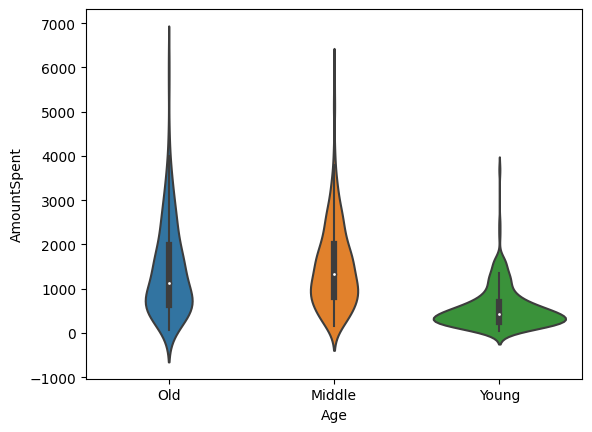

In [35]:
# A violinplot of Spending amount across age
sns.violinplot(x = "Age", y = "AmountSpent", data = dm)

## Scatterplots and Bubble Charts

We have reached the final section of our session, and what a journey it has been. We have looked into multiple ways we can represent data using bar plots, and then looked into visually representing numeric data. But now, what about visually representing relationships among numeric variables? Suppose we would expect that there should be a positive relationship between income and spenidng amount, but how do we visualize it? One of the most common ways to visualize relations among two variables is to draw a scatter plot!

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

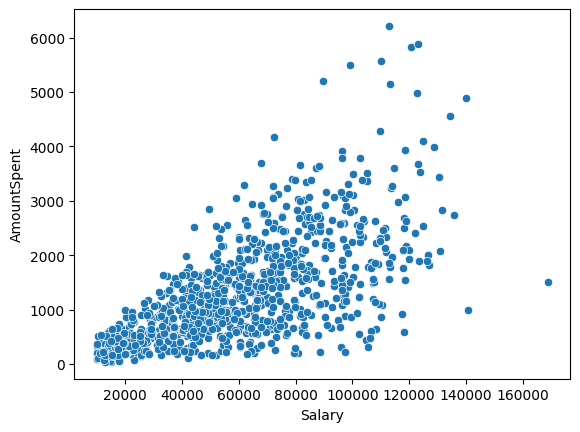

In [36]:
# Scatterplot of Salary and Spending Amount
sns.scatterplot(x = "Salary", y = "AmountSpent", data = dm)

Easily done! One thing to note is that there are a lot of dots in some areas, and a few dots in other areas. To make sure that we see how concetrated the dots are in some area, we can make these dots a little transparent

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

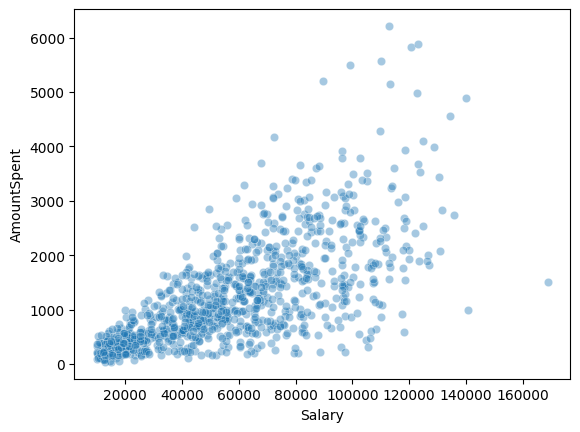

In [37]:
# To adjust the opacity of each of the points
sns.scatterplot(x = "Salary", y = "AmountSpent", data = dm, alpha = 0.4 )

As you can see, just changing the opacity of the points, we can see clearly where a lot of the points in the scatterplot are located

Now, what if we want to add a vertical and horizontal line to divide the chart into quadrants. Say we want to draw a line from spending of 3000, dividing those above as high spenders and those below as low spenders. Similarly we want to draw a vertical line at income of 1 lac, indicating those on the left to have low income and those on the right have high income

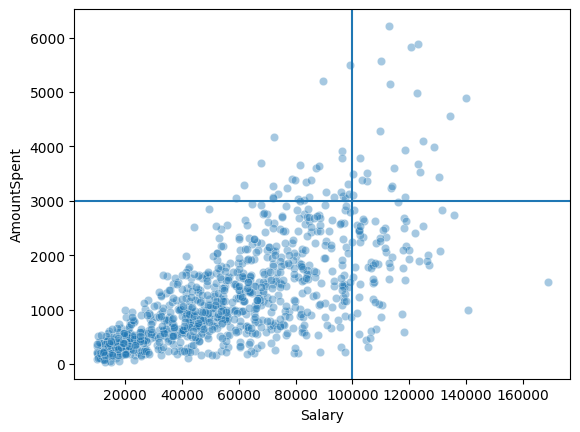

In [38]:
# This is a case where we get to see how opject oriented programing helps

# First, instead of printing the plot, we save it in a object

scatterplot = sns.scatterplot(x = "Salary", y = "AmountSpent", alpha = 0.4, data = dm)
scatterplot.axhline(3000)
scatterplot.axvline(100000)

Now you can see how when you know some basic codes about seaborn , how easy it is to create charts. Lets say we want to color the scatterplot based on age. Points will be colored based on which age group they belong to

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

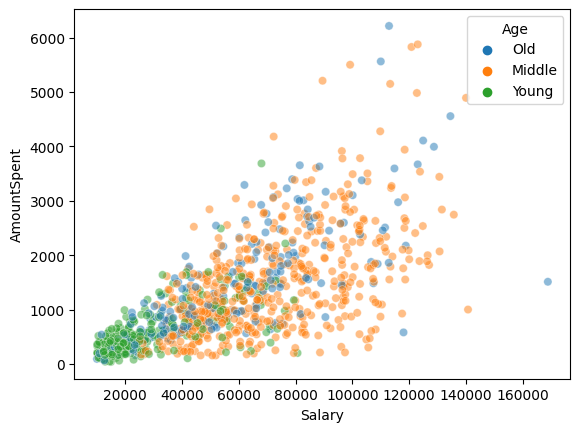

In [39]:
# Adding color to scatterplot points
sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", alpha = 0.5, data = dm)

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

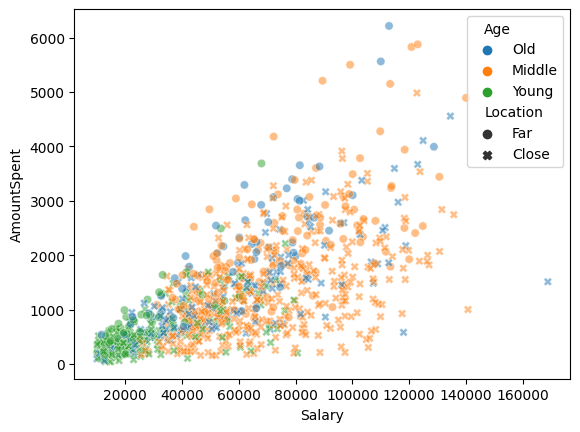

In [40]:
# How about besides the color, we add a shape? Suppose we also want to see whether these points belong to those who live far away or close by

sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", style = "Location", alpha = 0.5, data = dm)


<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

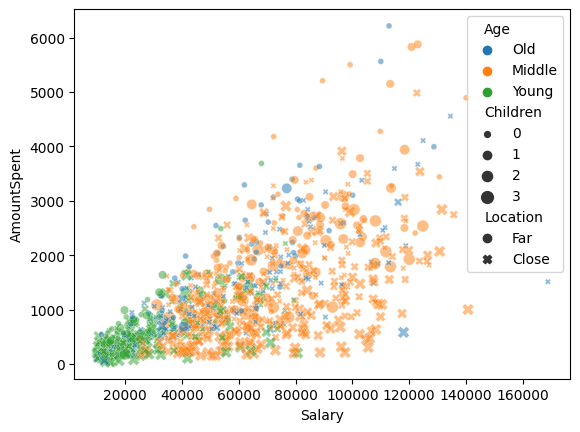

In [41]:
# What if we also want to check how the number of children can affect the relationship between Salary and Amountspent

sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", style = "Location", alpha = 0.5, size = "Children", data = dm)



That is a lot of dimension in our chart, and also its a chart that seems a bit congested. Lets use a handy funciton in matplotlib to increase the charting area in our jupyter notebook

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

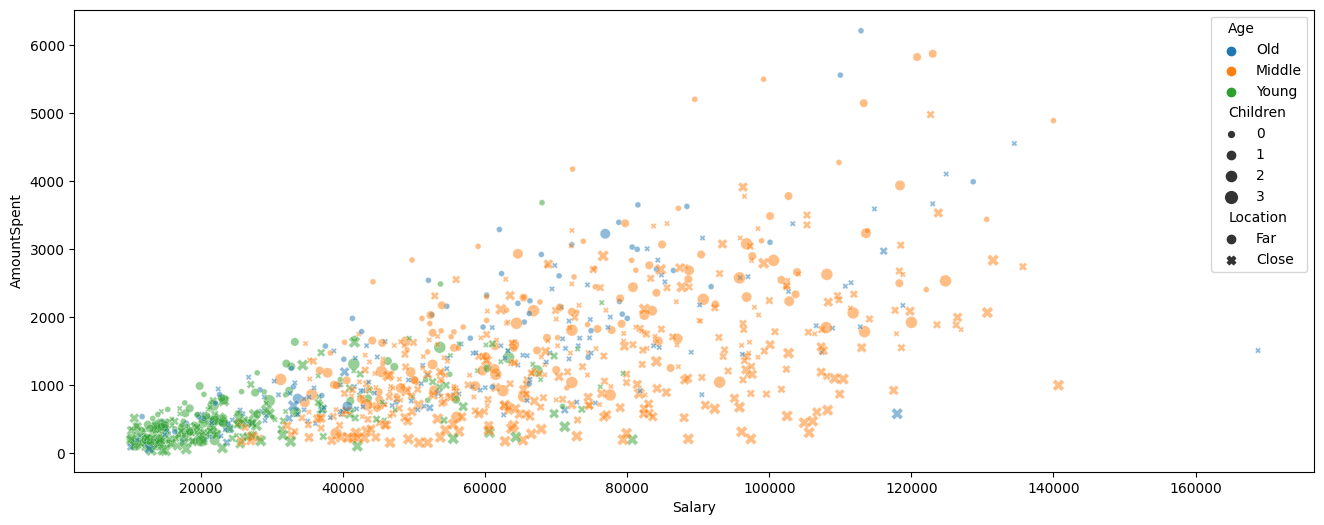

In [42]:
# Setting the size of the plotting area
plt.figure(figsize = (16,6))

# Now repeating our scatterplot
sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", style = "Location", alpha = 0.5, size = "Children", data = dm)

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

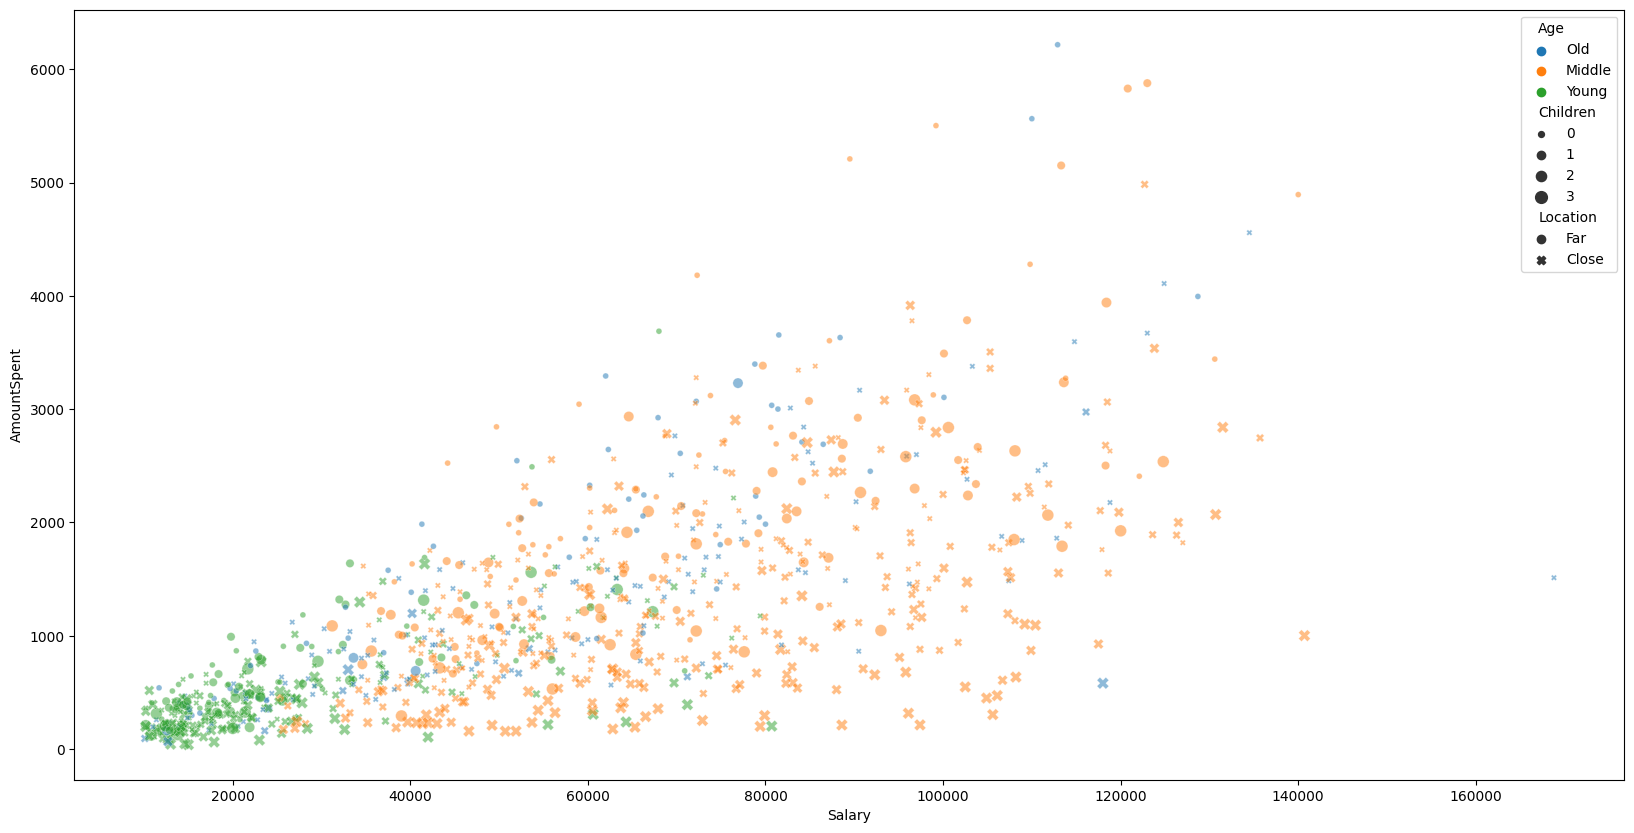

In [43]:
# Lets play around some more charting area

# Setting the size of the plotting area
plt.figure(figsize = (20,10))

# Now repeating our scatterplot
sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", style = "Location", alpha = 0.5, size = "Children", data = dm)

Seems like the bubbles and points a bit small. Lets remedy that

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

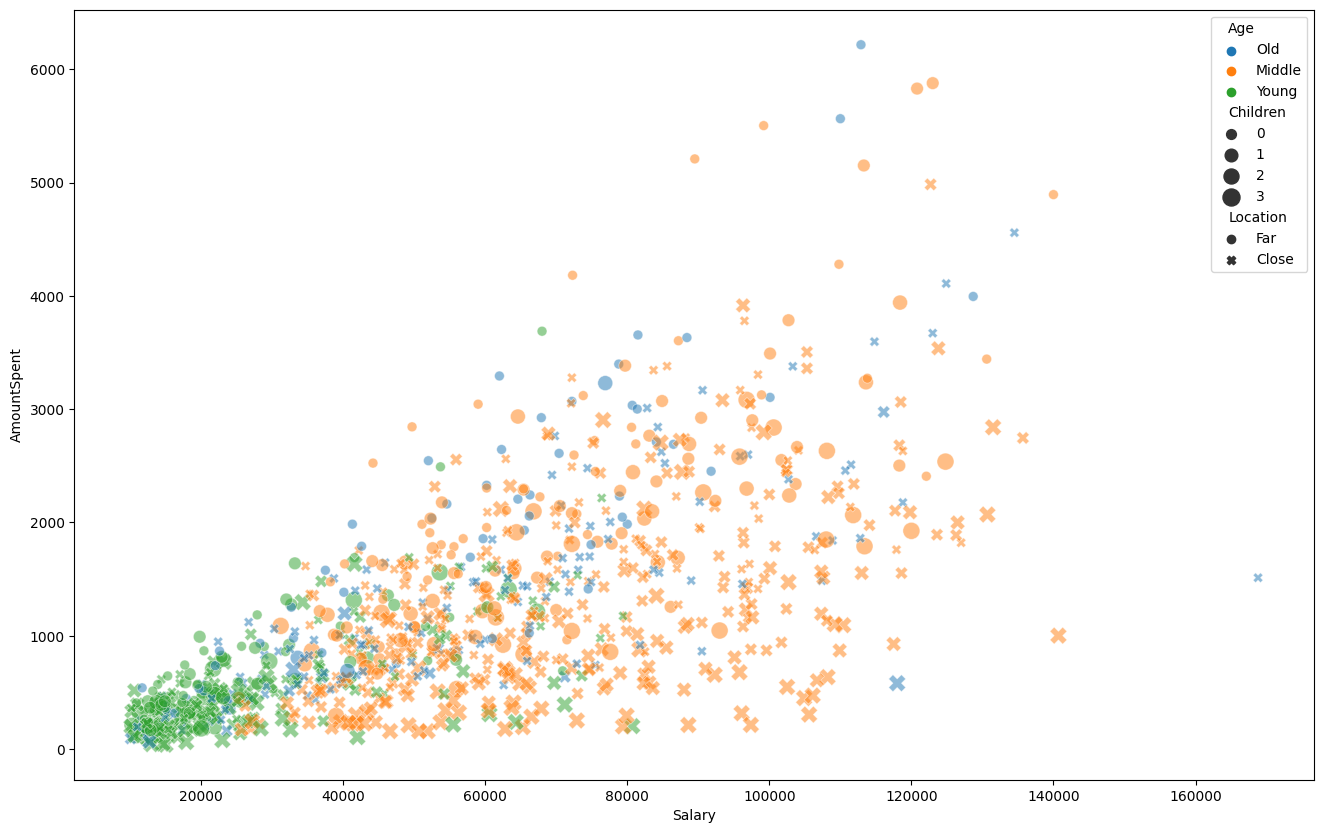

In [44]:
# Set the plotsize
plt.figure(figsize = (16,10))

# Creating the scatterplot
sns.scatterplot(x = "Salary", y = "AmountSpent", hue = "Age", style = "Location", alpha = 0.5, size = "Children", sizes = (50, 150), data = dm)



This summarized out session on data vizualization. We have just done only some of the possible visualizations using these charts from the DM dataset. A good next step will be to play around with the same code, but changing the different variables, which will give you more experience running these codes, and also will help you understand the data better. Next up - Statistical Tests